In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [53]:
df=pd.read_csv("C:/Users/sulru/Downloads/credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


## Above dataset contains 32581 rows and 12 columns.There are 8 numerical column and 4 categorical columns and this dataframe uses 3MB memory of this device.

In [4]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [5]:
df.describe(include='object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


In [6]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

# checking for the missing values

In [7]:
df.isnull().sum().sort_values(ascending=False)

loan_int_rate                 3116
person_emp_length              895
person_age                       0
person_income                    0
person_home_ownership            0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [8]:
# Identifying missing values in rows
#Rows with all missing values
df.isnull().all(axis=1).sum()

0

In [9]:
round(100*(df.isnull().sum()/len(df.index)), 2)

person_age                    0.00
person_income                 0.00
person_home_ownership         0.00
person_emp_length             2.75
loan_intent                   0.00
loan_grade                    0.00
loan_amnt                     0.00
loan_int_rate                 9.56
loan_status                   0.00
loan_percent_income           0.00
cb_person_default_on_file     0.00
cb_person_cred_hist_length    0.00
dtype: float64

In [10]:
# Treatment of missing values by median
# loan_int_rate by median
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())

# person_emp_length by median
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())

In [11]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

# Checking for duplicates

In [12]:
# checking for duplicates
df.duplicated().sum()

165

## There are 165 duplicated rows are present.

In [13]:
# drop duplicates
#df_unique = df.drop_duplicates(keep="last")

In [14]:
## separate num and cat
numerical_columns= df.select_dtypes(include=['float64','int64']).columns.to_list()
categorical_columns= df.select_dtypes(include=['object']).columns.to_list()
print(numerical_columns)
print('-'*80)
print(categorical_columns)

['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']
--------------------------------------------------------------------------------
['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


# Outliers detection using Box plot

In [15]:
numerical_columns

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_cred_hist_length']

person_age                       Axes(0.125,0.786098;0.168478x0.0939024)
person_income                 Axes(0.327174,0.786098;0.168478x0.0939024)
person_emp_length             Axes(0.529348,0.786098;0.168478x0.0939024)
loan_amnt                     Axes(0.731522,0.786098;0.168478x0.0939024)
loan_int_rate                    Axes(0.125,0.673415;0.168478x0.0939024)
loan_status                   Axes(0.327174,0.673415;0.168478x0.0939024)
loan_percent_income           Axes(0.529348,0.673415;0.168478x0.0939024)
cb_person_cred_hist_length    Axes(0.731522,0.673415;0.168478x0.0939024)
dtype: object

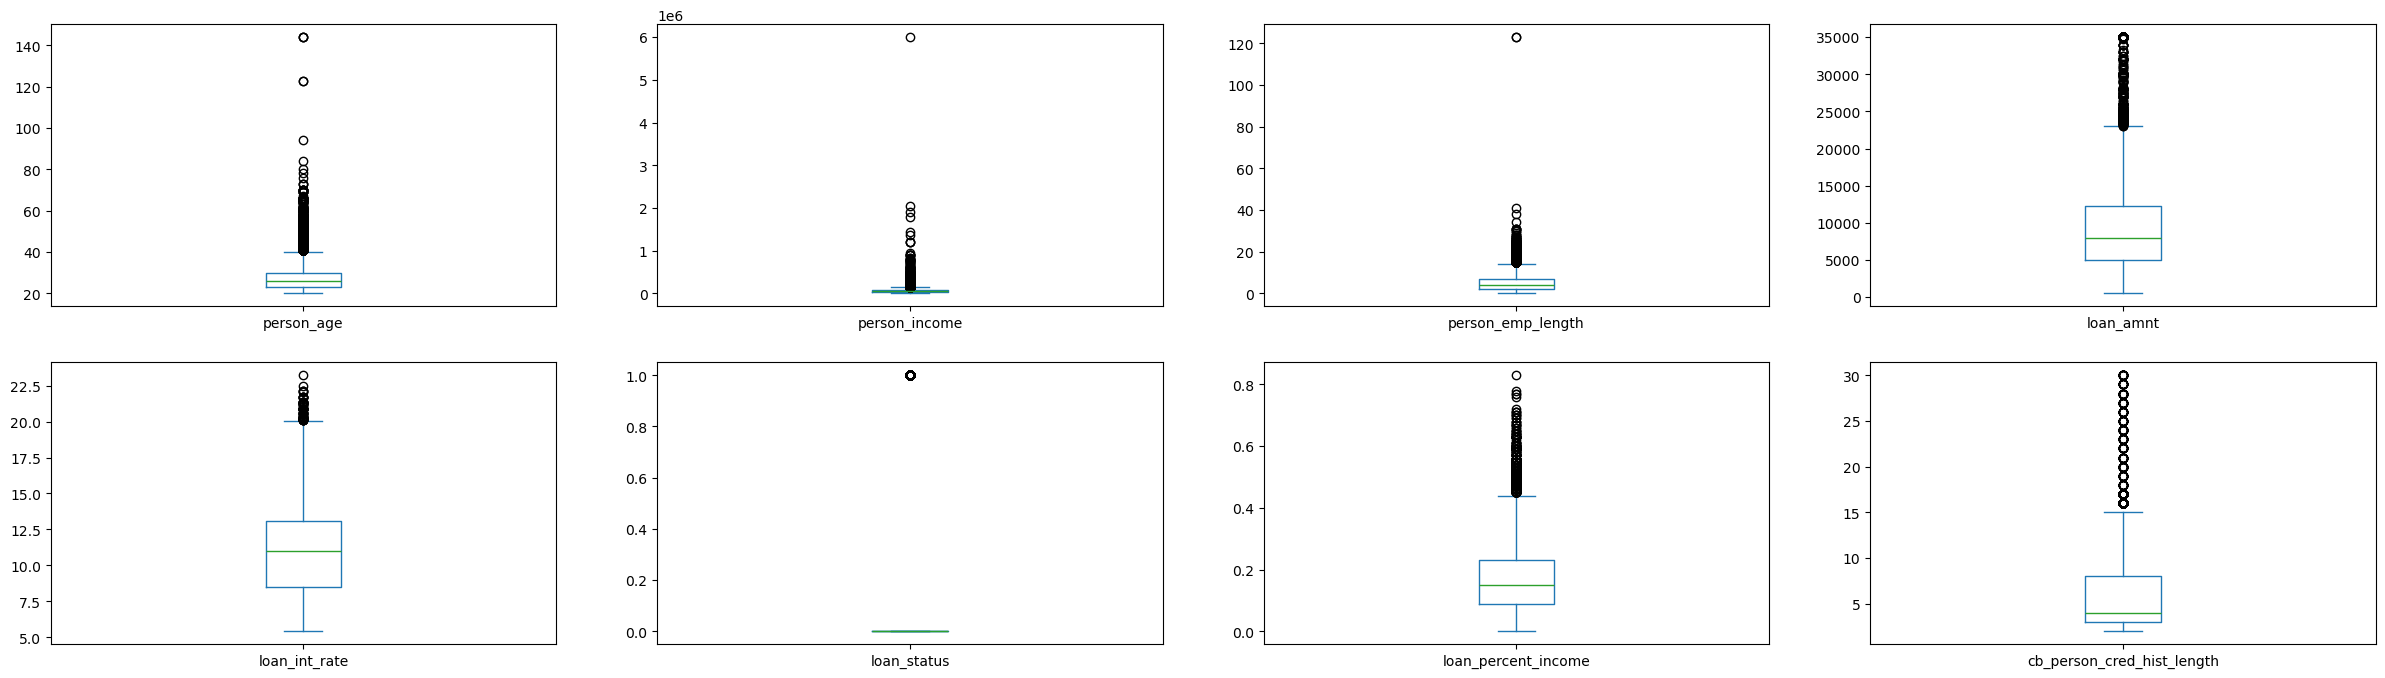

In [16]:
## box plot: Finding outliers and missing values also distribution of data.
df[numerical_columns].plot(kind= 'box', subplots= True, figsize=(30,30), layout=(7,4))

In [17]:
outliers_dict = {}
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_dict[col] = outliers

    print(f"\nColumn: {col}")
    print(f"Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")
    print(f"Number of Outliers: {outliers.shape[0]}")


Column: person_age
Lower Bound = 12.5, Upper Bound = 40.5
Number of Outliers: 1494

Column: person_income
Lower Bound = -22550.0, Upper Bound = 140250.0
Number of Outliers: 1484

Column: person_emp_length
Lower Bound = -5.5, Upper Bound = 14.5
Number of Outliers: 853

Column: loan_amnt
Lower Bound = -5800.0, Upper Bound = 23000.0
Number of Outliers: 1689

Column: loan_int_rate
Lower Bound = 1.5600000000000014, Upper Bound = 20.04
Number of Outliers: 70

Column: loan_status
Lower Bound = 0.0, Upper Bound = 0.0
Number of Outliers: 7108

Column: loan_percent_income
Lower Bound = -0.12000000000000002, Upper Bound = 0.44000000000000006
Number of Outliers: 651

Column: cb_person_cred_hist_length
Lower Bound = -4.5, Upper Bound = 15.5
Number of Outliers: 1142


In [18]:
# Capping outliers in loan amount 
lower_cap = df['loan_amnt'].quantile(0.25)
upper_cap = df['loan_amnt'].quantile(0.75)
df['loan_amnt'] = df['loan_amnt'].clip(lower=lower_cap, upper=upper_cap)        

In [19]:
# Removing age above 100 years.
df = df[df["person_age"] <= 100]

# Univariant Analysis: Numerical Features

In [20]:
def numerical_analysis(data):
    # Stat Analysis
    for col in data.columns:
        print("*" * 10, col, "*" * 10)
        print(data[col].agg({
            "Minimum": "min",
            "Max": "max",
            "Mean": "mean",
            "Median": "median",
            "STD": "std",
            "Skew": "skew",
            "Kurtosis": "kurt",
            "75th Percentile": lambda x: x.quantile(0.75),
            "95th Percentile": lambda x: x.quantile(0.95)
        }))
        print()

        # Viz Analysis (all 3 plots in one row)
        plt.figure(figsize=(6, 4))

        ## Subplot 1 - Histogram
        plt.subplot(1, 2, 1)
        data[col].plot(kind="hist", color="pink", bins=20, edgecolor="black")
        plt.title(f'{col}')

        ## Subplot 2 - KDE
        plt.subplot(1, 2, 2)
        data[col].plot(kind='kde')
        plt.title(f'{col} - KDE')
        plt.xlabel(col)
        plt.ylabel('Density')

        plt.tight_layout()
        plt.show()


********** person_age **********
Minimum            20.000000
Max                94.000000
Mean               27.718044
Median             26.000000
STD                 6.204990
Skew                1.944462
Kurtosis            5.877748
75th Percentile    30.000000
95th Percentile    40.000000
Name: person_age, dtype: float64



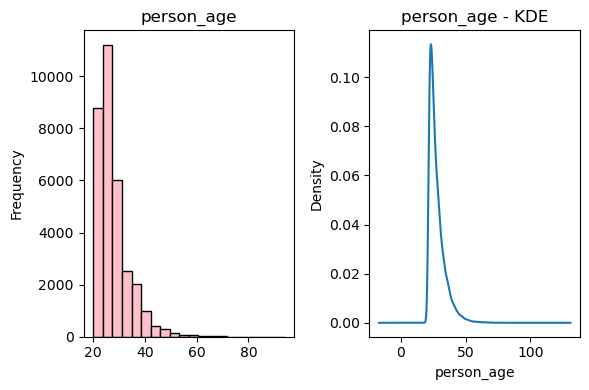

********** person_income **********
Minimum            4.000000e+03
Max                2.039784e+06
Mean               6.588214e+04
Median             5.500000e+04
STD                5.253499e+04
Skew               9.754192e+00
Kurtosis           2.249696e+02
75th Percentile    7.920000e+04
95th Percentile    1.380000e+05
Name: person_income, dtype: float64



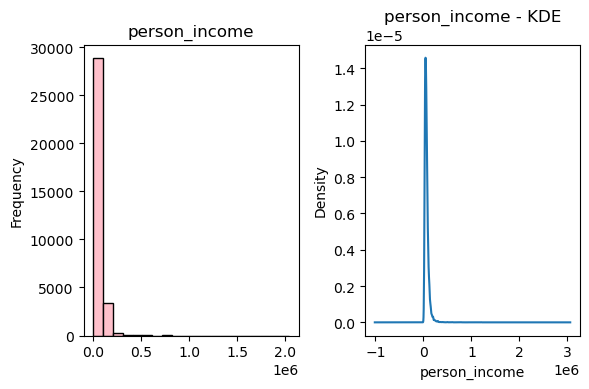

********** person_emp_length **********
Minimum              0.000000
Max                123.000000
Mean                 4.767835
Median               4.000000
STD                  4.087437
Skew                 2.663111
Kurtosis            45.006898
75th Percentile      7.000000
95th Percentile     12.000000
Name: person_emp_length, dtype: float64



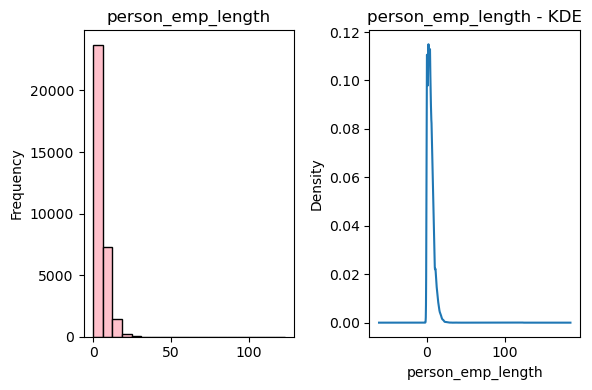

********** loan_amnt **********
Minimum             5000.000000
Max                12200.000000
Mean                8450.098999
Median              8000.000000
STD                 2989.329907
Skew                   0.101804
Kurtosis              -1.666654
75th Percentile    12200.000000
95th Percentile    12200.000000
Name: loan_amnt, dtype: float64



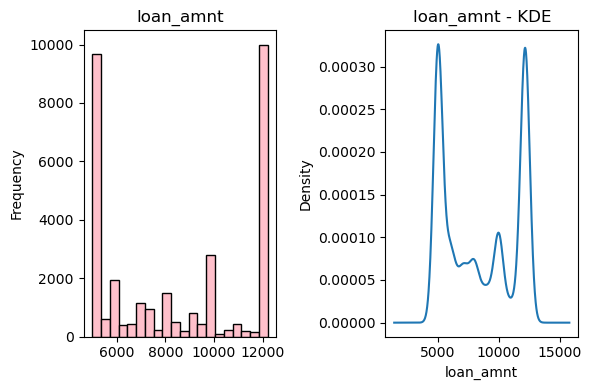

********** loan_int_rate **********
Minimum             5.420000
Max                23.220000
Mean               11.009486
Median             10.990000
STD                 3.081794
Skew                0.221420
Kurtosis           -0.424979
75th Percentile    13.110000
95th Percentile    16.290000
Name: loan_int_rate, dtype: float64



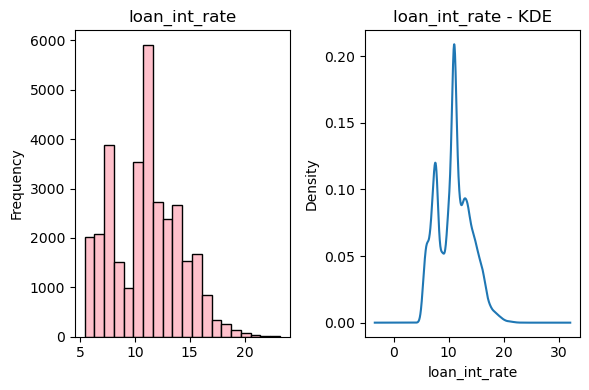

********** loan_status **********
Minimum            0.000000
Max                1.000000
Mean               0.218197
Median             0.000000
STD                0.413029
Skew               1.364651
Kurtosis          -0.137737
75th Percentile    0.000000
95th Percentile    1.000000
Name: loan_status, dtype: float64



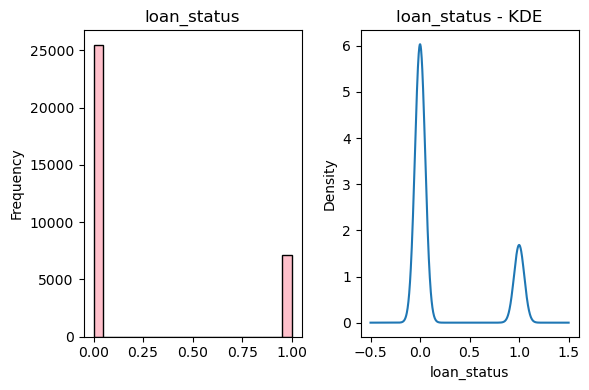

********** loan_percent_income **********
Minimum            0.000000
Max                0.830000
Mean               0.170212
Median             0.150000
STD                0.106778
Skew               1.064952
Kurtosis           1.224195
75th Percentile    0.230000
95th Percentile    0.380000
Name: loan_percent_income, dtype: float64



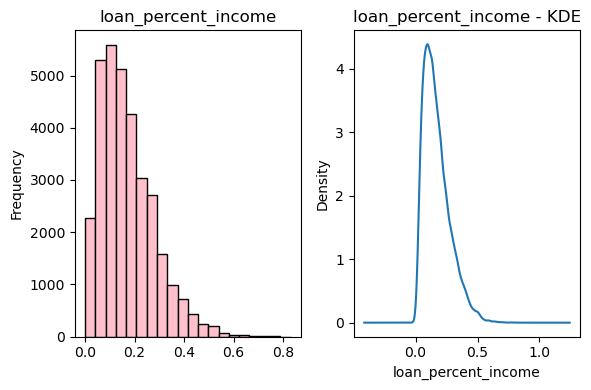

********** cb_person_cred_hist_length **********
Minimum             2.000000
Max                30.000000
Mean                5.803966
Median              4.000000
STD                 4.053791
Skew                1.660504
Kurtosis            3.710176
75th Percentile     8.000000
95th Percentile    14.000000
Name: cb_person_cred_hist_length, dtype: float64



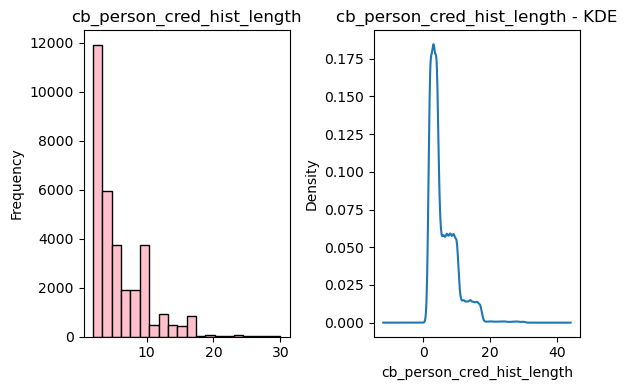

In [21]:
numerical_analysis(df[numerical_columns])

# Univariant Analysis:Frequency distribution of categorical features

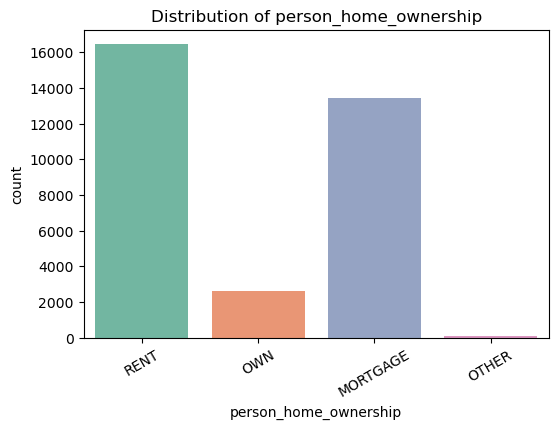

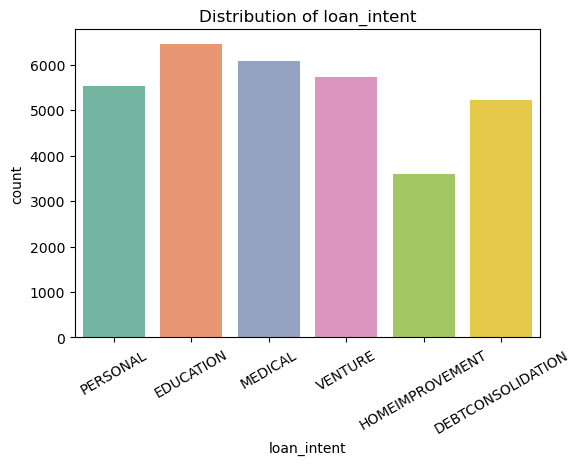

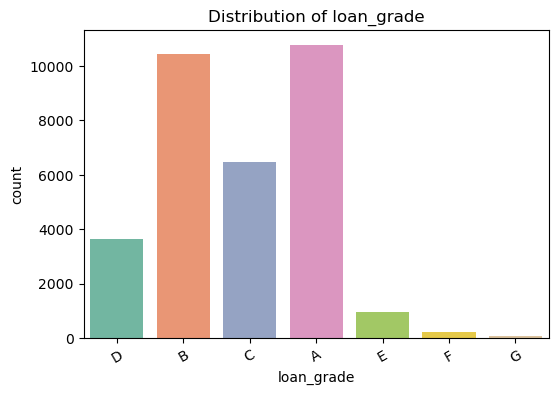

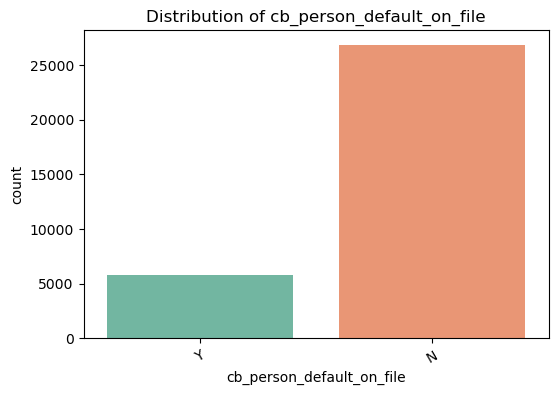

In [22]:
cat_cols = ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette="Set2")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=30)
    plt.show()

In [23]:
def categorical(data, categorical_columns):
    for column_name in categorical_columns:
        if column_name in data:
            print(f'--- {column_name} ---')
            print(data[column_name].agg(['count','nunique']))
            print(data[column_name].value_counts())
            print()

            # 2 plots: Countplot + Pie
            fig, axes = plt.subplots(1, 2, figsize=(8, 5))

            # Countplot
            sns.countplot(x=data[column_name], palette='rocket', ax=axes[0])
            axes[0].set_title(f'{column_name}')
            axes[0].set_xlabel(column_name)
            axes[0].set_ylabel('Count')

            # Pie chart
            data[column_name].value_counts().plot(
                kind='pie', autopct='%1.1f%%', ax=axes[1]
            )
            axes[1].set_ylabel("")  # remove y-label for pie
            axes[1].set_title(f'{column_name}')

            plt.tight_layout()
            plt.show()


--- person_home_ownership ---
count      32576
nunique        4
Name: person_home_ownership, dtype: int64
person_home_ownership
RENT        16443
MORTGAGE    13442
OWN          2584
OTHER         107
Name: count, dtype: int64



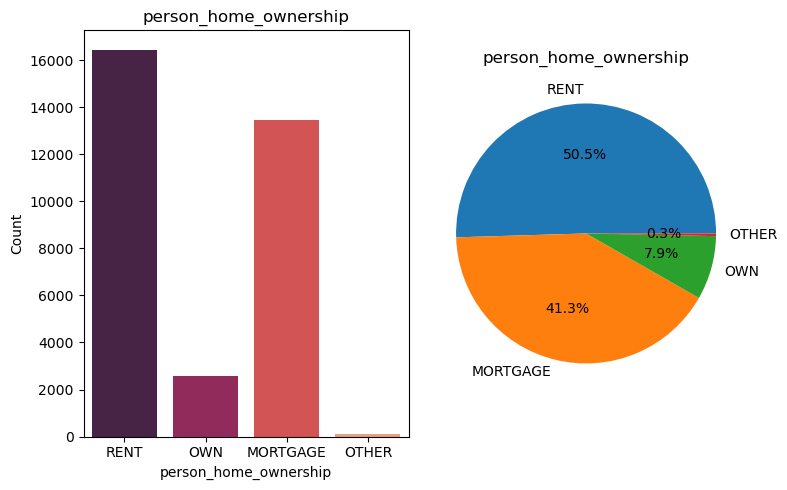

--- loan_intent ---
count      32576
nunique        6
Name: loan_intent, dtype: int64
loan_intent
EDUCATION            6451
MEDICAL              6071
VENTURE              5717
PERSONAL             5520
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64



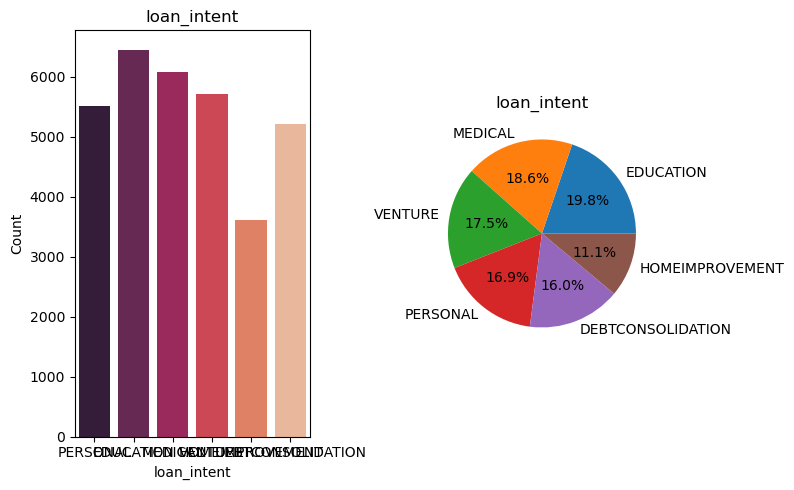

--- loan_grade ---
count      32576
nunique        7
Name: loan_grade, dtype: int64
loan_grade
A    10777
B    10448
C     6456
D     3626
E      964
F      241
G       64
Name: count, dtype: int64



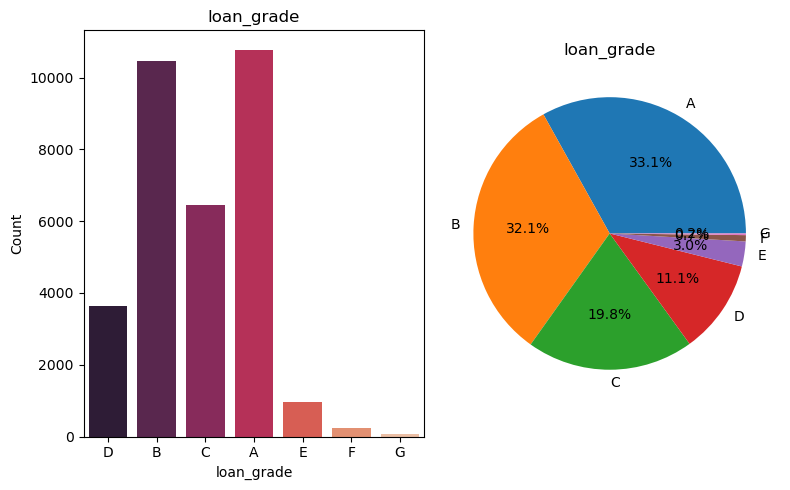

--- cb_person_default_on_file ---
count      32576
nunique        2
Name: cb_person_default_on_file, dtype: int64
cb_person_default_on_file
N    26831
Y     5745
Name: count, dtype: int64



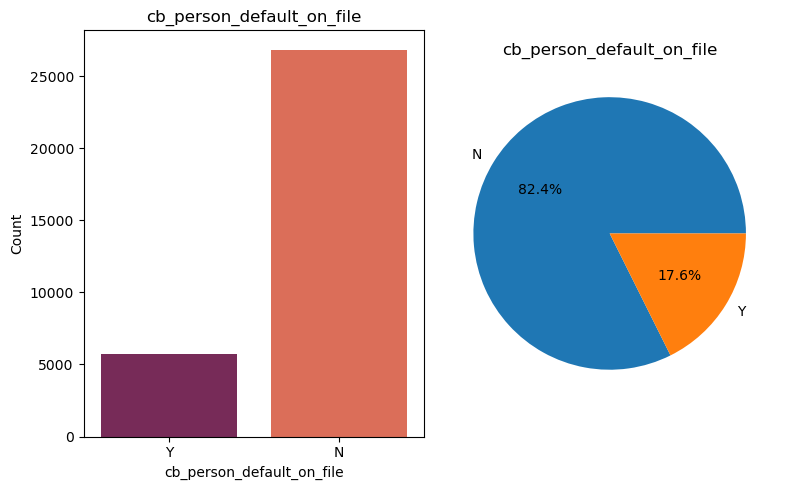

In [24]:
categorical(df,categorical_columns)

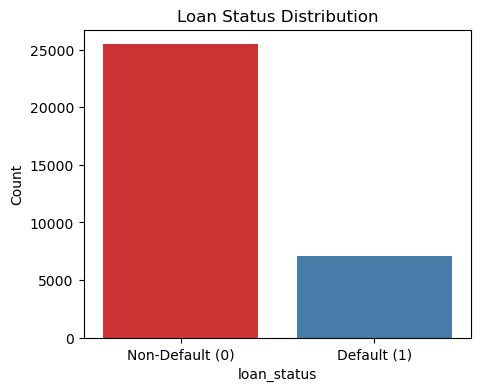

In [25]:
# loan status distribution
plt.figure(figsize=(5,4))
sns.countplot(x="loan_status", data=df, palette="Set1")
plt.title("Loan Status Distribution")
plt.xticks([0,1], ["Non-Default (0)", "Default (1)"])
plt.ylabel("Count")
plt.show()

# Bivariant analysis

### Numerical vs Target

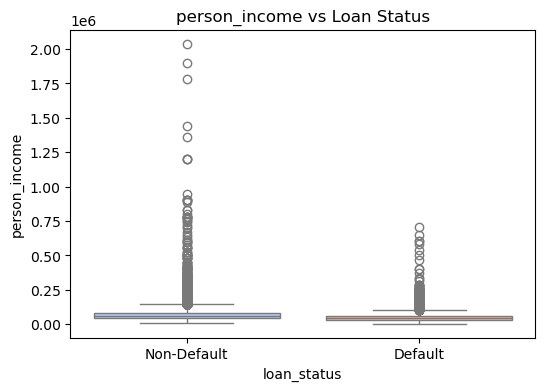

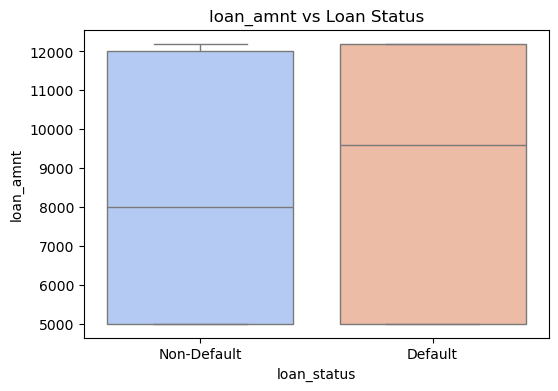

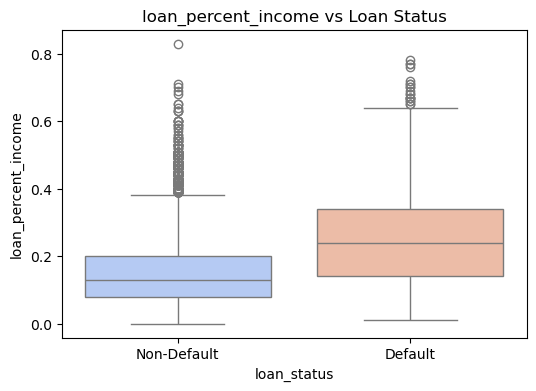

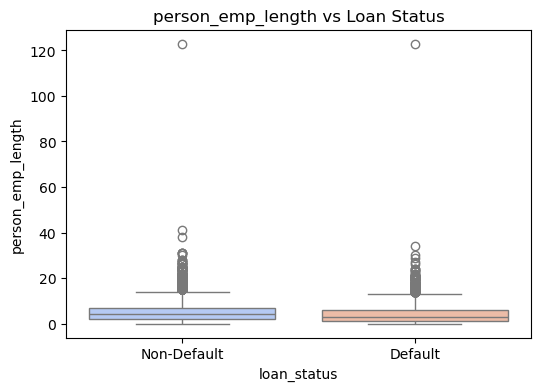

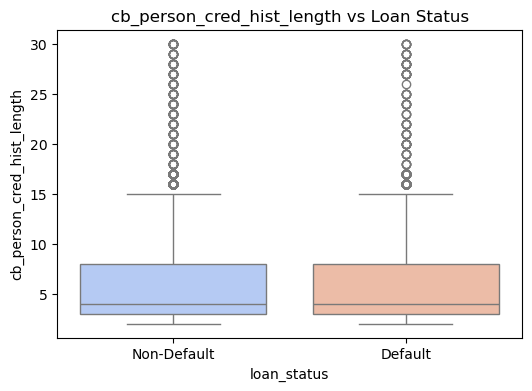

In [26]:
# Num vs LOAN status
num_cols = ["person_income", "loan_amnt", "loan_percent_income","person_emp_length","cb_person_cred_hist_length"]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="loan_status", y=col, data=df, palette="coolwarm")
    plt.title(f"{col} vs Loan Status")
    plt.xticks([0,1], ["Non-Default", "Default"])
    plt.show()

In [27]:
## num vs num independent

In [28]:
def plot_numerical_relationship(df, x_col, y_col, figsize=(5, 3), scatter_kws=None, line_kws=None, ci=95):
       
    # Create the plot
    plt.figure(figsize=figsize)
    sns.regplot(x=x_col, y=y_col, data=df, scatter_kws={"color": "green"},  line_kws={"color": "red"})

    # Set plot title and labels
    plt.title(f'Relationship b/w {x_col} & {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)

    # Display the plot
    plt.tight_layout()
    plt.show()

In [29]:
numerical_columns

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_cred_hist_length']

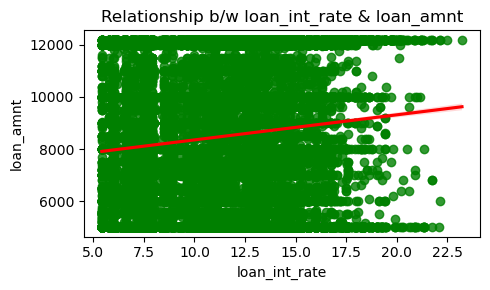

In [30]:
plot_numerical_relationship(df, x_col='loan_int_rate', y_col='loan_amnt')

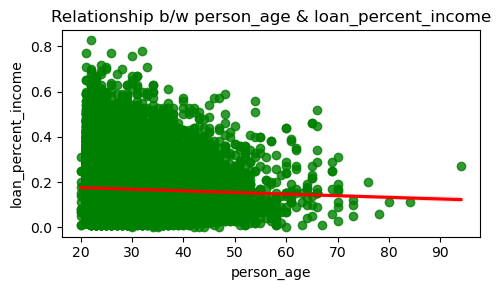

In [31]:
plot_numerical_relationship(df, x_col='person_age', y_col='loan_percent_income')

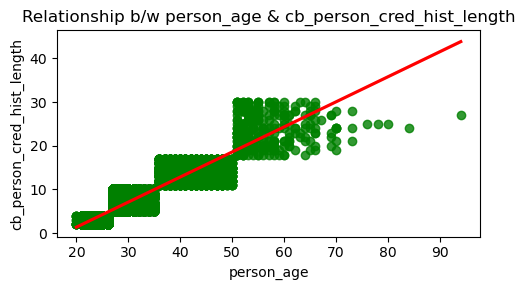

In [32]:
plot_numerical_relationship(df, x_col='person_age', y_col='cb_person_cred_hist_length')

## categorical vs Target

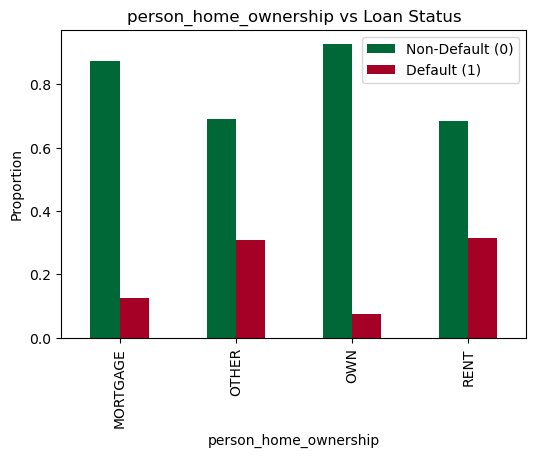

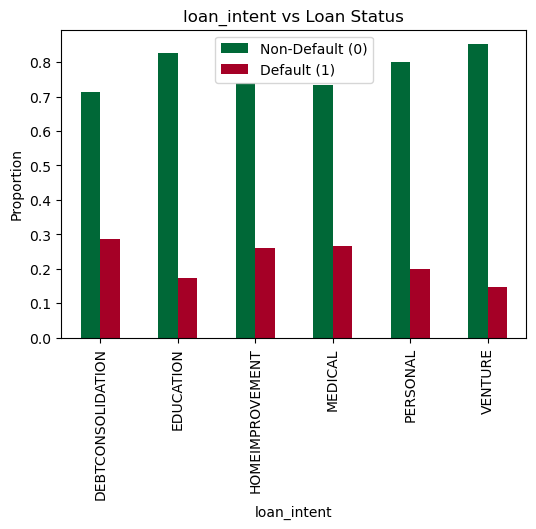

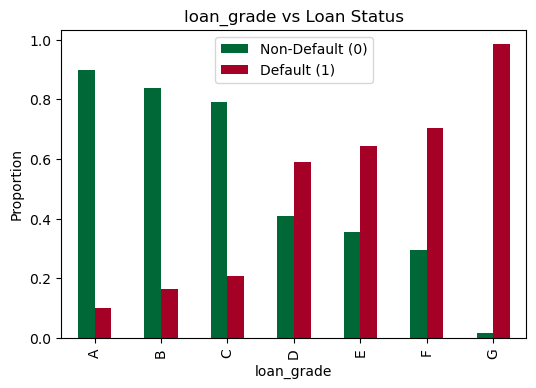

In [33]:
# cat vs target
cat_cols = ["person_home_ownership", "loan_intent", "loan_grade"]

for col in cat_cols:
    ct = pd.crosstab(df[col], df["loan_status"], normalize="index")
    ct.plot(kind="bar", stacked=False, figsize=(6,4), colormap="RdYlGn_r")
    plt.title(f"{col} vs Loan Status")
    plt.ylabel("Proportion")
    plt.legend(["Non-Default (0)", "Default (1)"])
    plt.show()

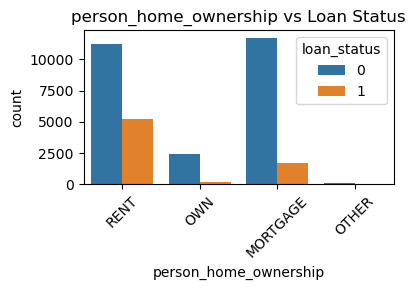

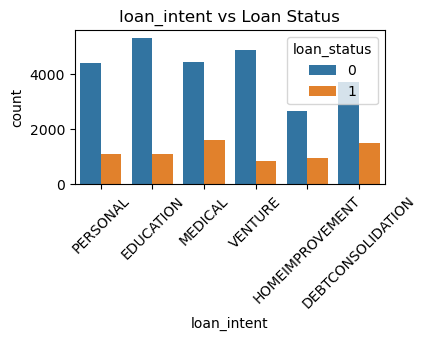

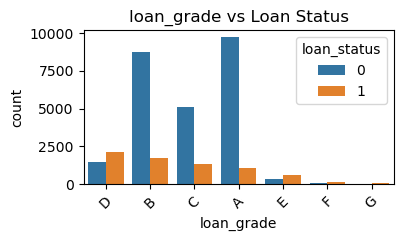

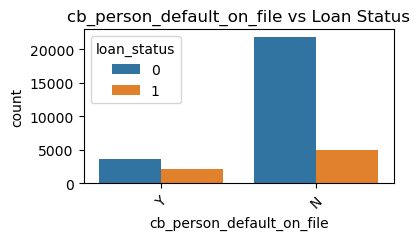

In [34]:
for col in categorical_columns:
    plt.figure(figsize=(4,2))
    sns.countplot(x=col, hue="loan_status", data=df)
    plt.title(f"{col} vs Loan Status")
    plt.xticks(rotation=45)
    plt.show()

In [35]:
cat_cols = ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]

for col in cat_cols:
    ct = pd.crosstab(df[col], df["loan_status"], normalize="index")
    print(f"\nDefault rates by {col}:")
    print(ct)


Default rates by person_home_ownership:
loan_status                   0         1
person_home_ownership                    
MORTGAGE               0.874275  0.125725
OTHER                  0.691589  0.308411
OWN                    0.925310  0.074690
RENT                   0.684243  0.315757

Default rates by loan_intent:
loan_status               0         1
loan_intent                          
DEBTCONSOLIDATION  0.714121  0.285879
EDUCATION          0.827779  0.172221
HOMEIMPROVEMENT    0.738974  0.261026
MEDICAL            0.732993  0.267007
PERSONAL           0.801087  0.198913
VENTURE            0.851845  0.148155

Default rates by loan_grade:
loan_status         0         1
loan_grade                     
A            0.900436  0.099564
B            0.837194  0.162806
C            0.792596  0.207404
D            0.409542  0.590458
E            0.355809  0.644191
F            0.294606  0.705394
G            0.015625  0.984375

Default rates by cb_person_default_on_file:
loan_stat

## categorical vs categorical

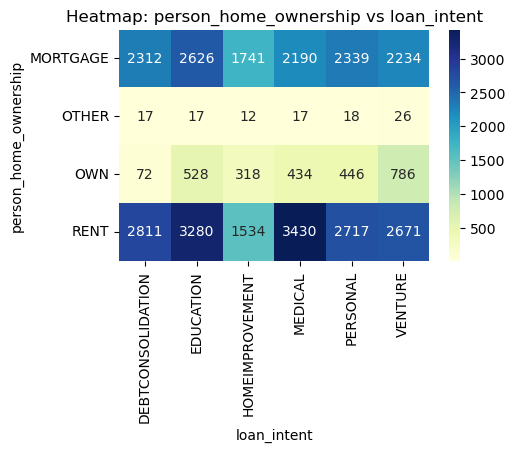

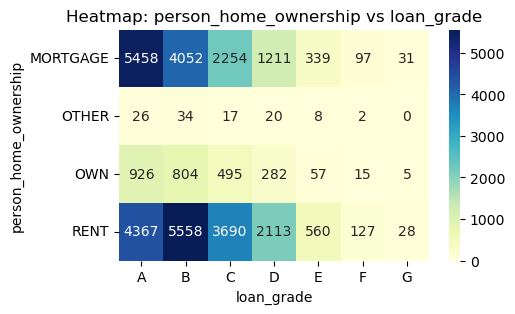

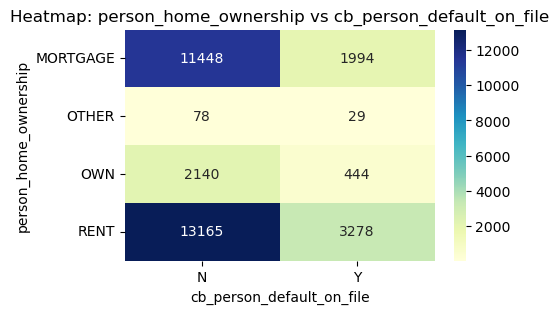

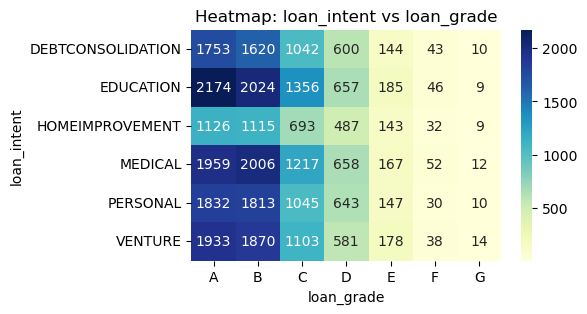

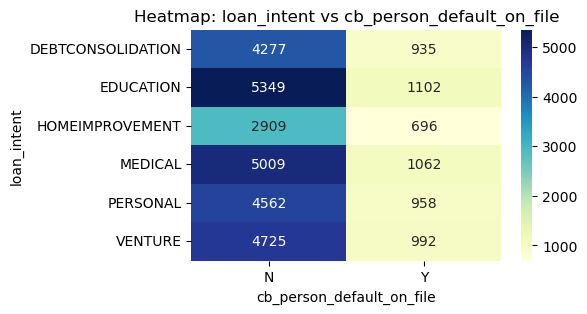

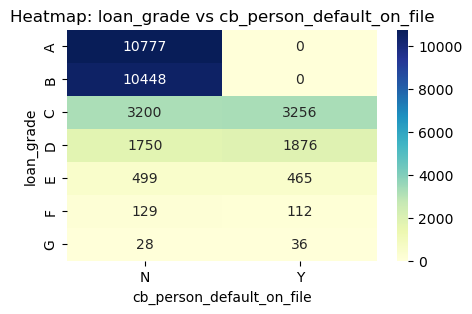

In [36]:
for i, col1 in enumerate(categorical_columns):
    for j, col2 in enumerate(categorical_columns):
        if i < j:  # only upper triangle, avoids duplicates
            ct = pd.crosstab(df[col1], df[col2])
            plt.figure(figsize=(5,3))
            sns.heatmap(ct, annot=True, fmt="d", cmap="YlGnBu")
            plt.title(f"Heatmap: {col1} vs {col2}")
            plt.xlabel(col2)
            plt.ylabel(col1)
            plt.show()

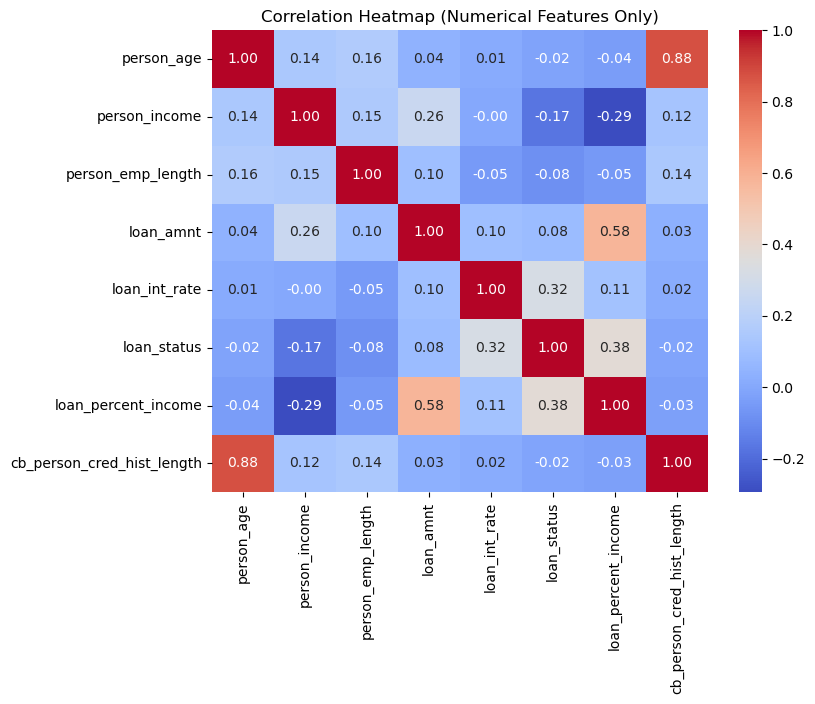

In [37]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()


In [38]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,12200,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,5000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,12200,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,12200,14.27,1,0.55,Y,4


In [39]:
df.to_csv("new.csv",index=False)

# Sprint 3

### Step 1

In [46]:
corr = df.corr(numeric_only=True).abs()

# Get upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# Drop features with high correlation
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
print("Dropped features:", to_drop)

df = df.drop(columns=to_drop)

Dropped features: ['cb_person_cred_hist_length']


### step:2

### step:3

In [48]:
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

### Step - 4: Data preparation on train data

In [49]:
X = pd.get_dummies(X, drop_first=True)

### Step - 5: Data preparation on test data

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [54]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Step - 6: Model Training Phase 

In [56]:
models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name}: {acc:.3f}")

KNN: 0.896
Logistic Regression: 0.862
SVM: 0.913
Decision Tree: 0.896
Random Forest: 0.932


### Step - 7: Predict and evaluate

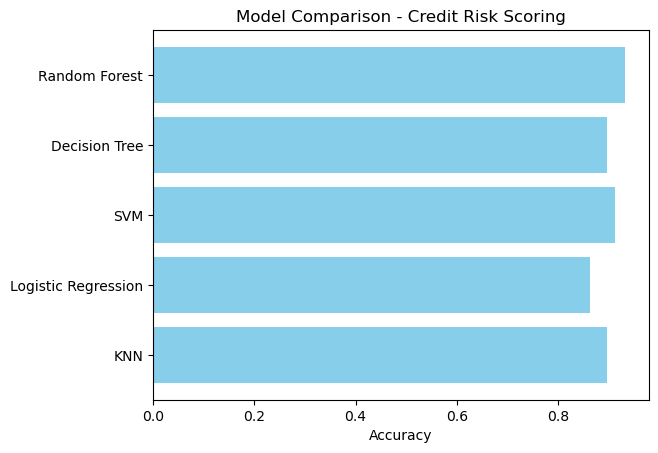

In [57]:
plt.barh(list(results.keys()), list(results.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Comparison - Credit Risk Scoring')
plt.show()

### Random Forest performs best for credit risk tasks because it handles complex patterns well.Rndom forest gives 93% accuracy.